# Pacotes

In [21]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.linear_model import LinearRegression as Lr
from sklearn.tree import DecisionTreeRegressor as Dtr
from sklearn.ensemble import RandomForestRegressor as rfr

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('df_meta.csv')

# Validação

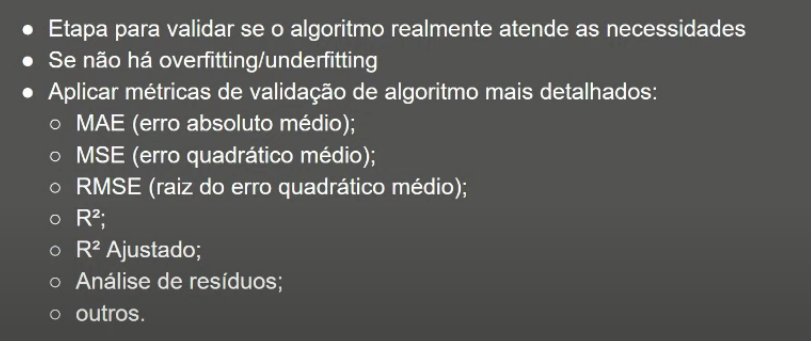

In [ ]:
# Uma possível validação da regressão é avaliar a distância do ponto previsto com os dados que se tem.
# Com base nisso podemos avaliar o erro do modelo.
# Todas as técnicas de validação acima fazem isso, só que de forma diferente.
# No nosso caso utilizaremos o r^2 pois é o mais simples de ser avaliado.
# O r^2 (não é o coeficiente de pearson)
# retorna um valor entre 0 e 1. Quão mais perto de 1 mais correlacionado as variáveis estão.

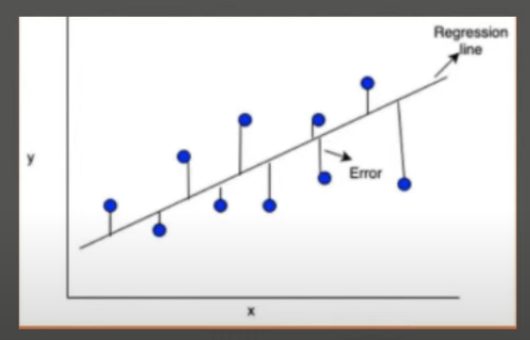

In [ ]:
# Precisamos agora escolher as variáveis

# Modelo Machine Learning

## Definindo Base Treino e Teste

In [58]:
drop_colunas_x = ['id','valor_limpo','valor_limpo_log','manual','álcool','híbrido','gásnatural',
                 'elétrico','semi-automático']

dados_modelo = df.copy()

x = dados_modelo.drop(columns = drop_colunas_x+['km_log','ano_log'])
y = dados_modelo.valor_limpo

x_log = dados_modelo.drop(columns = drop_colunas_x+['km','ano'])
y_log = dados_modelo.valor_limpo_log

x_treino, x_teste, y_treino,y_teste = train_test_split(x,y,test_size=.2,random_state=1234)

x_treino_log, x_teste_log,y_treino_log, y_teste_log = train_test_split(x_log,y_log,test_size = .2, random_state=1234) 

x_treino.columns,x_treino_log.columns

(Index(['Unnamed: 0', 'ano', 'km', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'),
 Index(['Unnamed: 0', 'ano_log', 'km_log', 'automático', 'diesel', 'flex',
        'gasolina'],
       dtype='object'))

## Treinando modelos

In [72]:
resultados = []
lr = Lr()
lr.fit(x_treino,y_treino)
resultados.append(('lr',lr.score(x_teste,y_teste)))


lr_log = Lr()
lr_log.fit(x_treino_log,y_treino_log)
resultados.append(('lr_log',lr_log.score(x_teste_log,y_teste_log)))

In [70]:
resultados = []
dtr = Dtr()
dtr.fit(x_treino,y_treino)
resultados.append(('dtr',dtr.score(x_teste,y_teste)))


dtr_log = Dtr()
dtr_log.fit(x_treino_log,y_treino_log)
resultados.append(('dtr_log',dtr_log.score(x_teste_log,y_teste_log)))

In [68]:
resultados = []
rfr = rfr()
rfr.fit(x_treino,y_treino)
resultados.append(('rfr',lr.score(x_teste,y_teste)))


rfr_log = rfr()
rfr_log.fit(x_treino_log,y_treino_log)
resultados.append(('rfr_log',rfr_log.score(x_teste_log,y_teste_log)))

TypeError: 'RandomForestRegressor' object is not callable

## Validando modelos

0.72976696094957 0.7840889624501413


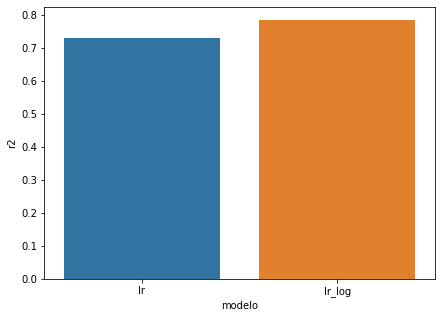

In [73]:
plt.figure(figsize=(7,5))

df_resultados = pd.DataFrame(resultados,columns=['modelo','r2'])

print(df_resultados.r2.min(),df_resultados.r2.max())

sns.barplot(x='modelo',y='r2',data= df_resultados.sort_values('r2'))
plt.show()